# Iris Flowers Classification: Neural Network Approach

This short project consists of a classification model utilizing a neural network. The neural network is built with keras sequential model with the Adam optimization algorithm. Additionally, there are plots for both training loss and accuracy to benchmark the model over the span of 20 epochs, and a visualization of the predictions made by the model on the test data split.

In [1]:
# libraries
import keras
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IrisFlowersDataset.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Splitting Dataset into Train / Test
x = df.iloc[:, 0:4]
y = df.iloc[:,4]
x = x.values

# One hot encode Varities of Iris into integers
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

# Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
# Neural Network Model using Keras-Sequential Model
model = keras.Sequential(
    [
        keras.layers.Dense(4, input_shape=(4,), activation="relu", name="layer1"),
        keras.layers.Dense(3, activation="softmax", name="outputLayer")
    ]
)

# Configuration and Compiling
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [5]:
# Fiting The Model
epochData = model.fit(
    x_train,
    y_train, 
    epochs=20, 
    shuffle=True,
    batch_size=21
)

Epoch 1/20


5/5 [==============================] - 1s 4ms/step - loss: 1.1410 - accuracy: 0.3524
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 1.0221 - accuracy: 0.4571
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 1.0000 - accuracy: 0.3524
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.9675 - accuracy: 0.3524
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.9309 - accuracy: 0.3524
Epoch 6/20
5/5 [==============================] - 0s 0s/step - loss: 0.8838 - accuracy: 0.4571
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.7619
Epoch 8/20
5/5 [==============================] - 0s 0s/step - loss: 0.7961 - accuracy: 0.6667
Epoch 9/20
5/5 [==============================] - 0s 527us/step - loss: 0.7447 - accuracy: 0.6571
Epoch 10/20
5/5 [==============================] - 0s 0s/step - loss: 0.7011 - accuracy: 0.6571
Epoch 11/20
5/5 [=====================

In [6]:
# Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 4)                 20        
                                                                 
 outputLayer (Dense)         (None, 3)                 15        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


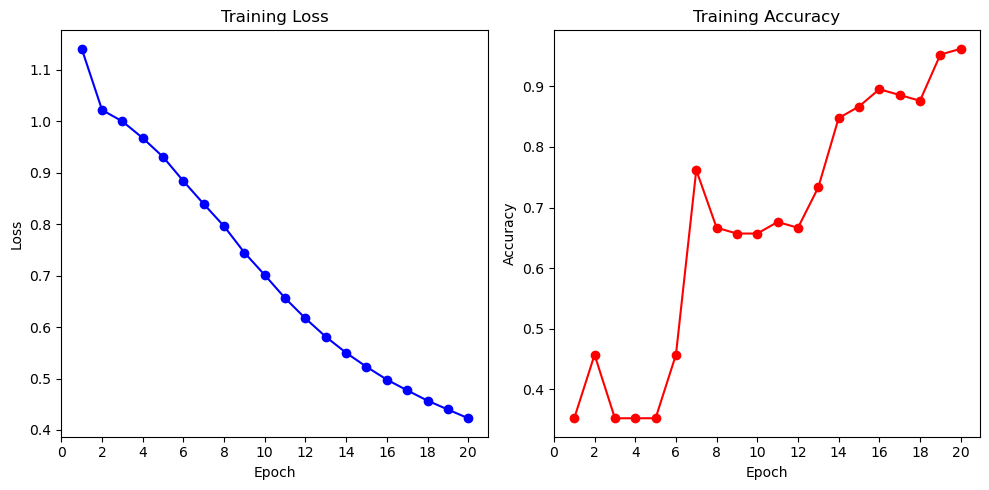

In [7]:
# Plotting Learning Curve of Model
loss_values = epochData.history['loss']
accuracy_values = epochData.history['accuracy']

# Number of epochs
epochs = range(1, len(loss_values) + 1)

# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(
    epochs, 
    loss_values, 'bo-', 
    label='Training loss'
)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,21,2))
plt.ylabel('Loss')

# Plotting the training accuracy
plt.subplot(1, 2, 2)
plt.plot(
    epochs, 
    accuracy_values, 
    'ro-', 
    label='Training accuracy'
)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,21,2))
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [8]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 20ms/step - loss: 0.3434 - accuracy: 0.9778


[0.34336352348327637, 0.9777777791023254]

In [9]:
# Predictions, Changing Format
pred=model.predict(x_test)
predData=np.argmax(pred, axis=1)
yData=np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 0s/step


In [10]:
# Prettier Formatting for Predictions
varietyMapping = {
    0: "Setosa",
    1: "Versicolor",
    2: "Virginica"
}

# Printing in a tabular format
print("Variety:     Predicted:")
print("----------------------")
for pred, actual in zip(predData, yData):
    predClass = varietyMapping.get(pred)
    actualClass = varietyMapping.get(actual)
    incorrect=""
    if predClass!=actualClass:
        incorrect="<-- Incorrect"
    print(f"{actualClass:<10} {predClass} {incorrect}")

Variety:     Predicted:
----------------------
Versicolor Versicolor 
Setosa     Setosa 
Virginica  Virginica 
Versicolor Versicolor 
Versicolor Versicolor 
Setosa     Setosa 
Versicolor Versicolor 
Virginica  Virginica 
Versicolor Virginica <-- Incorrect
Versicolor Versicolor 
Virginica  Virginica 
Setosa     Setosa 
Setosa     Setosa 
Setosa     Setosa 
Setosa     Setosa 
Versicolor Versicolor 
Virginica  Virginica 
Versicolor Versicolor 
Versicolor Versicolor 
Virginica  Virginica 
Setosa     Setosa 
Virginica  Virginica 
Setosa     Setosa 
Virginica  Virginica 
Virginica  Virginica 
Virginica  Virginica 
Virginica  Virginica 
Virginica  Virginica 
Setosa     Setosa 
Setosa     Setosa 
Setosa     Setosa 
Setosa     Setosa 
Versicolor Versicolor 
Setosa     Setosa 
Setosa     Setosa 
Virginica  Virginica 
Versicolor Versicolor 
Setosa     Setosa 
Setosa     Setosa 
Setosa     Setosa 
Virginica  Virginica 
Versicolor Versicolor 
Versicolor Versicolor 
Setosa     Setosa 
Setosa     Set

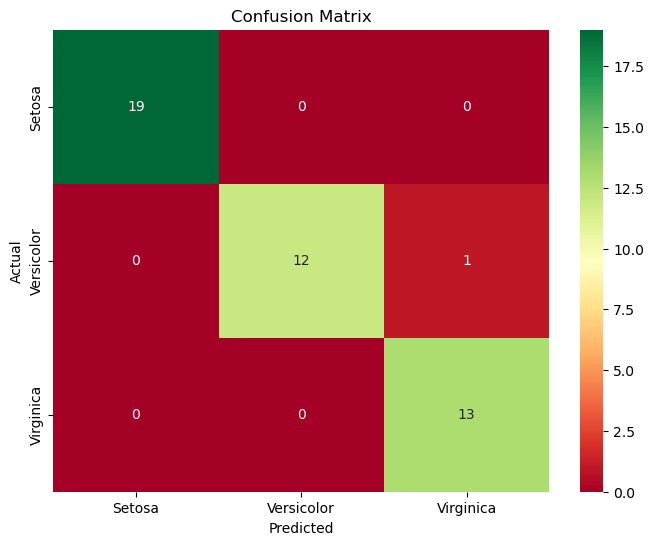

In [11]:
# Confusion Matrix Heatmap
cm = confusion_matrix(yData, predData)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    cmap='RdYlGn', 
    fmt='d', 
    xticklabels=varietyMapping.values(), 
    yticklabels=varietyMapping.values()
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()